# Sympy tutorial

In [95]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
# One can also write 'from sympy import *' so that we don't need to write sp. before every command but that is bad practice
import math   # This module contains basic algebraic commands and is inherently installed in python (don't need to do pip install)
              # However, math is a numeric module akin to numpy and not a symbolic module

In [ ]:
sp.sqrt(2) # square root command. This is also inherently found in the 'math' module of python

sqrt(2)

In [ ]:
# Make a symbol
x = sp.Symbol('x')  # X is both the name of the variable and its symbol

2*x+5   # prints the espression using x as a symbol

2*x + 5

In [7]:
# The variable name and symbol name do not need to coincide

y= sp.Symbol('z')
y

z

In [9]:
# sympy can simplify expressions automatically

2 * x + x - 5

3*x - 5

In [ ]:
# Sine and cosine

sp.sin(x)**2 + sp.cos(x)**2  # This is not simplified even tho it is equal to 1

sin(x)**2 + cos(x)**2

In [11]:
# fractions are simplified if they are improper

6*x / 10

3*x/5

In [12]:
# variables also get simplified in fractions if possible

3*x/x

3

In [ ]:
# sympy will not expand parenthesis if not specified otherwise

expr = x*(x+2)
expr

x*(x + 2)

## expansion of expressions

In [15]:
# we can expand parenthesis by specifying:

expr.expand()

x**2 + 2*x

In [16]:
# however, the espression remains the same

expr

x*(x + 2)

In [17]:
# one can also use expand as a function

sp.expand(expr)

x**2 + 2*x

### Multiple symbols definition

In [18]:
sp.symbols('s t')   # This is saved as a tuple


(s, t)

In [ ]:
type(sp.symbols('s t'))  # as can be seen by the type command

tuple

In [20]:
# we can use tuple unpacking to separate the symbols and assign them to different variables

s, t = sp.symbols('s t')

In [23]:
# simple polinomial

pol = t*(s+2)*(t-3)
pol

t*(s + 2)*(t - 3)

In [24]:
# expanding it

pol.expand()

s*t**2 - 3*s*t + 2*t**2 - 6*t

### Factoring expressions

In [ ]:
expr = x**2 + 2*x -15
expr.factor()   # This factors an expression if possible

(x - 3)*(x + 5)

In [ ]:
# if we want to create a vector of symbols, we use the symbols command

x_v = sp.symbols('x0:3')   # This creates a tuple that contains x0, x1, x2, with x3 excluded
x_v

(x0, x1, x2)

In [27]:
ex = x_v[0]**2 * x_v[1]* x_v[2] + x_v[0] * x_v[1] * x_v[2]
ex

x0**2*x1*x2 + x0*x1*x2

In [28]:
ex.factor()

x0*x1*x2*(x0 + 1)

# Data types and common functions

In [30]:
x = sp.Symbol('x')
expr = x**(1/3)
expr

x**0.333333333333333

Sympy integer type

In [32]:
# To avoid having 1/3 evaluated as a floating point which gives a periodic number, we use sympy integers
expr = x**(sp.Integer(1)/sp.Integer(3))
expr

x**(1/3)

In [33]:
# even more simply:
expr**(sp.Integer(1)/5)

x**(1/15)

This is because when we have an interaction between a sympy and a normal python object the normal object is transformed into a sympy object automatically

### Sympy rational type

In [ ]:
# Just like integers, we can have rational sympy rational number types
rational = sp.Rational(1,3)
rational   # This is not 0,666666666, this is exactly 1/3

1/3

In [35]:
# hence we could have just written the following:

expr = (x**sp.Rational(1,3))**sp.Rational(1,5)
expr

x**(1/15)

### Important constants

In [ ]:
sp.pi   # pigreco
sp.E    #euler's number
sp.oo   #infinity, which works exactly as we think it does

oo

In [ ]:
sp.oo-sp.oo      # infinity minus infinity gives an error

nan

In [39]:
sp.I  # imaginary unit

I

In [40]:
# complex arithmetic is implemented in sympy
sp.I**2

-1

### Common functions

In [41]:
# exponential function

sp.exp(x)

exp(x)

In [43]:
# euler's identity

sp.exp(sp.pi*sp.I)

-1

In [ ]:
# logarithm

sp.log(x)    #is the natural logarithm
sp.exp(sp.log(x))

x

In [ ]:
# trigonometric functions
sp.sin(x)
sp.cos(x)
sp.tan(x)
sp.cot(x)
sp.cosh(x)

#etc

# Solving equations

In [63]:
x, y, z = sp.symbols('x, y, z')

# in python, the = symbol is already used to assign a variable so we cannot use it in an equation

In [46]:
# e want to define x^2 = 5

eq = sp.Eq(x**2, 5)     # On the left of the comma we have the left hand side and on the right the right hand side
eq

Eq(x**2, 5)

In [ ]:
# in order to solve the equation, we can use solveset which gives the set of solutions:

sp.solveset(eq, x)   # if we have a single variable we don't need to specify the ',x', but for multiple variables we need to specify for which variable we want to solve

{-sqrt(5), sqrt(5)}

In [48]:
type(sp.solveset(eq))

sympy.sets.sets.FiniteSet

In [50]:
# we want to extract the first solution

list(sp.solveset(eq,x)) [0]

sqrt(5)

We can also solve $x^2-5=0$ instead of $x^2=5$

In [52]:
eq=sp.Eq(x**2-5, 0)
sp.solveset(eq, x)

{-sqrt(5), sqrt(5)}

Example: trig equation

In [53]:
eq2 = sp.Eq(sp.cos(x)-sp.sin(x), 0)
eq2

Eq(-sin(x) + cos(x), 0)

In [ ]:
sp.solveset(eq2)   # this gives an infinite set of solutions because the solutions are infinite since it is a trig equation

Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers))

In [55]:
type(sp.solveset(eq2) )

sympy.sets.sets.Union

Third example: equation which is simbolically impossible to solve

In [61]:
# We define an equation which is only solvable numerically

eq3 = sp.Eq(sp.cos(x), x)
eq3

Eq(cos(x), x)

In [ ]:
sp.solveset(eq3)   # of course we get that the solution of the equation is the x which solves the equation which is a tautology

ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

In [60]:
type(sp.solveset(eq3))

sympy.sets.conditionset.ConditionSet

## Solving systems of linear equations

In [66]:
eq_lin1 = sp.Eq(x, 3*y+z)
eq_lin2 = sp.Eq(5*x-3*z, y)

In [ ]:
# we want to solve the system

sp.linsolve([eq_lin1, eq_lin2], x, y, z)  # this gives a set where the first position is x, the second y and the third z
# since we have more than one variables we need to explicitly say which variables we solve for, which is all three

{(4*z/7, -z/7, z)}

## Simplifying expressions

In [68]:
poly = x**2 +5*x + 6
poly

x**2 + 5*x + 6

In [69]:
poly.factor()

(x + 2)*(x + 3)

In [70]:
poly.expand()

x**2 + 5*x + 6

In [71]:
# we can also expand exponential terms
sp.exp(x+y)

exp(x + y)

In [72]:
(sp.exp(x+y)).expand()

exp(x)*exp(y)

In [75]:
# for a trig expression
trig = (sp.cos(x) + sp.sin(x))**2 - sp.cos(x)**2
trig

(sin(x) + cos(x))**2 - cos(x)**2

In [76]:
trig.expand()

sin(x)**2 + 2*sin(x)*cos(x)

If we only want to expand certin elements of the expression, while maintaining everything else static, we can use additional arguments in the expand() expression

In [79]:
# trig and exponential expressions
trig_and_exp = sp.exp(x+y) + (sp.cos(x) + sp.sin(x))**2 - sp.cos(x)**2

In [80]:
# to expand everything:
trig_and_exp.expand()

exp(x)*exp(y) + sin(x)**2 + 2*sin(x)*cos(x)

In [81]:
# if we only wish to expand trig factors:

trig_and_exp.expand(power_exp=False)  # with this parametre we turn off the expansion of exponential terms

exp(x + y) + sin(x)**2 + 2*sin(x)*cos(x)

### Simplyfying rational functions

We can use cancel() and apart() to simplify rational functions, which have polinomia both at the numerator and denominator.

The cancel method will take any rational function of the form $\frac{p(x)}{q(x)}$ and factor it so the polinomials p(x) and q(x) have no common factor

In [83]:
p = x**3 + 10*x**2 + 31*x + 30
q = x**2 + 12*x + 35
fraction = p/q
fraction

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [84]:
fraction.cancel()

(x**2 + 5*x + 6)/(x + 7)

The apart method will perform the partial fraction decomposition of a rational fraction

In [85]:
p = x**3 + 10*x**2 + 31*x + 30
q = x**2 + 12*x + 35
fraction = p/q
fraction

(x**3 + 10*x**2 + 31*x + 30)/(x**2 + 12*x + 35)

In [86]:
fraction.apart()

x - 2 + 20/(x + 7)

### The general simplify method

The simplify() method is the most versatile but also the most unspecific and slowest

In [88]:
expr = sp.exp(x+y) + (sp.cos(x) + sp.sin(x))**2-sp.cos(x)-sp.exp(x)
expr

(sin(x) + cos(x))**2 - exp(x) + exp(x + y) - cos(x)

In [ ]:
# general simplification
expr.simplify()   # This gives the expression in its most simplified form, but if we need more fine tuning we should refer to the previous methods

-exp(x) + exp(x + y) + sin(2*x) - cos(x) + 1

# Evaluating expressions

### Real, positive and integer symbols

In sympy, symbols are automatically considered complex, but some expressions only make sense if the symbol is real, like
$\log(e^x)=x$ which is only true for real numbers. Hence if we have more knowledge of the symbol we shall specify it to sympy.

In [5]:
# if we don't specify the variable type, some expressions will not be simplified
z = sp.Symbol('z')
sp.log(sp.exp(z))

log(exp(z))

In [7]:
# we want to make three real symbols

x0, x1, x2 = sp.symbols('x0:3', real=True)  # this is important for the simplification of some expressions

#so if we want to verify the previous identity
sp.log(sp.exp(x0))

x0

In [9]:
# if we don't specify that x is positive, the square root of x^2 will give the module of x
sp.sqrt(x0**2)

Abs(x0)

In [10]:
# we make a positive symbol

x = sp.Symbol('x', positive=True)
sp.sqrt(x**2)   # now we get x instead of the module of x

x

In [12]:
# we can also make an integer symbol
n = sp.Symbol('n', integer=True)

In [13]:
# thus, the expression (-1)^(2n) will give 1 because n is an integer and 2n is always even

(-1)**(2*n)   

1

## Point evaluation of expressions

In python we use the .subs() method

In [14]:
# create an expression
expr = x0**2 + 5
expr

x0**2 + 5

In [23]:
# insert pi into the expression

num = expr.subs(x0, sp.pi)  # this substitutes x0 with pi in the expression
num

5 + pi**2

.subs() will not change the expression

In [ ]:
# we can insert another expression into the expression
expr.subs(x0, x1**2)

x1**4 + 5

### Going numeric

In [24]:
# if we want to translate a symbolic number (like 5+pi^2) into a numeric number, we use sp.N
# the standard umber of decimal places is 15, but we can specify the number of decimal places we want

sp.N(num)

14.8696044010894

In [ ]:
# we can change the number of decimals

sp.N(num, 3)   # this gives us 3 decimals

14.9

In [26]:
# we can also make constants in expressions numeric
expr = sp.pi + 5
expr

pi + 5

In [ ]:
sp.N(expr)  # converts pi into its value and adds 5

8.14159265358979

# Calculus with sympy

### Derivatives

In [2]:
x, y = sp.symbols('x y')

#### Basic differentiation

We can use sp.diff() to differentiate a function

In [30]:
# defining an expression
expr = sp.exp(2*x) + sp.sin(x)
expr

exp(2*x) + sin(x)

In [31]:
# we differentiate the expression
sp.diff(expr, x)  # this gives us the derivative of the expression with respect to x, if we have one variable we don't need to specify the variable

2*exp(2*x) + cos(x)

In [33]:
# we can differentiate multiple times
sp.diff(sp.diff(expr))

# or

sp.diff(expr, x, x)

# or

sp.diff(expr, x, 2)

4*exp(2*x) - sin(x)

## Rewriting functions

We can use the .rewrite() command to to rewrite a function in terms of another function

In [4]:
# our expression
expr = sp.exp(sp.sinh(x))/sp.exp(sp.exp(x)/2)
expr

exp(-exp(x)/2)*exp(sinh(x))

In [6]:
# we can rewrite everything in terms of exponential functions because sinh is a sum of exponentials

expo = expr.rewrite(sp.exp)
expo

exp(exp(x)/2 - exp(-x)/2)*exp(-exp(x)/2)

In [7]:
# we can now simplify

expo.simplify()

exp(-exp(-x)/2)

In [8]:
# simplyfying the expression right away would not have worked, because first we need to rewrite the sinh in terms of exponentials
expr.simplify()

exp(-exp(x)/2 + sinh(x))

## Rewriting and partial derivatives

we can use sp.diff() to take partial derivatives. When doing this, the rewrite function is often helpful to get the partial derivative in a specific form.

In [9]:
# defining a multivariable function
two_variables = sp.cos(x) * sp.cot(2*y)**2
two_variables

cos(x)*cot(2*y)**2

In [11]:
# differentiating with respect to y
partial_y = sp.diff(two_variables, y)  # this gives us the derivative with respect to y
partial_y

(-4*cot(2*y)**2 - 4)*cos(x)*cot(2*y)

In [12]:
# trying to get it in a simplified form

partial_y.rewrite(sp.sin)

(-4 - sin(4*y)**2/sin(2*y)**4)*sin(4*y)*sin(x + pi/2)/(2*sin(2*y)**2)

In [14]:
# it is still very complex, so first we try to simplify the original partial_y expression
simplified_y = partial_y.simplify()
simplified_y

-4*cos(x)*cot(2*y)/sin(2*y)**2

In [15]:
# now we can rewrite it

simplified_y.rewrite(sp.sin)

-2*sin(4*y)*sin(x + pi/2)/sin(2*y)**4

In [ ]:
# we can try to take the third derivative with respect to x and the second with respect to y

two_variables.diff(x, 3, y, 2)  # the order of differentiation does not matter.

8*(cot(2*y)**2 + 1)*(3*cot(2*y)**2 + 1)*sin(x)

# Integration

We use sp.integrate() to do both definite and indefinite integrals

In [5]:
x, y, z = sp.symbols('x y z', real = True)  # we define the variables as real

## Indefinite integrals

In [6]:
# define a function
f = sp.cos(2*x)*sp.sin(3*x)
f

sin(3*x)*cos(2*x)

In [7]:
# indefinite integral of the function

sp.integrate(f)  # this gives us the indefinite integral of the function with respect to x

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

In [8]:
# to check this is really the integral, we can differentiate it

sp.integrate(f).diff()

sin(3*x)*cos(2*x)

The integral does not give +c as we would write in calculus, but we can add it on our own

In [9]:
C = sp.Symbol('C')
sp.integrate(f) + C

C - 2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

In [10]:
# we can emphasize the variable x

sp.integrate(f,x)

-2*sin(2*x)*sin(3*x)/5 - 3*cos(2*x)*cos(3*x)/5

### Multivariable integration

In [11]:
g = x**y
g

x**y

In [12]:
# we integrate with respect to x
h = sp.integrate(g, x)  # this is a symbolic integral, so we cannot expect to get a number, but a function of x and y
h

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))

This is a piecewise defined function, meaning it has different expressions depending on the value of the variable

In [13]:
type(h)

Piecewise

In [14]:
# h will behave as you would expect

h*f

Piecewise((x**(y + 1)/(y + 1), Ne(y, -1)), (log(x), True))*sin(3*x)*cos(2*x)

In [15]:
(h*f).simplify()

Piecewise((x**(y + 1)*sin(3*x)*cos(2*x)/(y + 1), (y > -1) | (y < -1)), (log(x)*sin(3*x)*cos(2*x), True))

## Definite integrals

In [16]:
f

sin(3*x)*cos(2*x)

In [17]:
# we can specify the limits of integration

sp.integrate(f, (x, 0, sp.pi))  # this gives us the definite integral of the function with respect to x from 0 to pi

6/5

### Example

In [18]:
u = sp.exp(-x)
u

exp(-x)

In [19]:
# we integrate the function from 0 to infinity

sp.integrate(u, (x, 0, sp.oo))

1

## Multivariable integrals

In [20]:
w = x*y*z**2
w

x*y*z**2

In [21]:
#indefinite integral with respect to x and y
sp.integrate(w, x, y)

x**2*y**2*z**2/4

In [22]:
# definite integral with respect to x, y, z with integration limits specified for each variable
sp.integrate(w, (x, 0, 1), (y, 1, 5), (z, 0, 3))

54

# Limits and series

## Limits

In [23]:
x = sp.Symbol('x')
expr = x ** 2
expr

x**2

In [28]:
# we take the limit for x going to 1

sp.limit(expr, x, 1)

1

Since $x^2$ is a continuous function, taking the limit just equates to substituting 1 into the equation.

In [27]:
expr.subs(x, 1)

1

### Limits at infinity

In [29]:
# Rapidly decaying function

exponential = x/sp.exp(x)
exponential

x*exp(-x)

In [30]:
# Taking the limit
sp.limit(exponential, x, sp.oo)

0

Substitution does not work here because the function value is not defined at infinity, but the limit is

### Watch out! Limits are always taken from the right

In [32]:
expr = 1/x
expr

1/x

In [ ]:
# limit is by default the right limit in sympy (x goes to 0 from the right)

sp.limit(expr, x, 0)

oo

In [36]:
# the limit from the left would give -oo
sp.limit(expr, x, 0, '-')  # this gives us the limit from the left

-oo

In [35]:
# getting both right and left limits
sp.limit(expr, x, 0, '+-')

zoo

We get a tilde symbol to indicate that the two limits are not the same

## Series

We can locally expand functions with a Taylor series

In [ ]:
# finding the taylor series of sin(x) at x = pi/2
sp.series(sp.sin(x), x, sp.pi/2)


1 - (x - pi/2)**2/2 + (x - pi/2)**4/24 + O((x - pi/2)**6, (x, pi/2))

**What we can do with Taylor series**

In [38]:
expr = sp.exp(sp.sin(x))
expr

exp(sin(x))

In [ ]:
sp.series(expr, x, 0, 8)  # this gives us the taylor series of the function at x = 0 up to the 8th order term

1 + x + x**2/2 - x**4/8 - x**5/15 - x**6/240 + x**7/90 + O(x**8)

In [ ]:
# We can do arithmetics with Taylor expansions

(sp.series(expr, x, 0, 8)*sp.series(sp.sin(x), x, 0, 6)).expand()

# the expand command athe the end is not necessary, but it is useful to see the result in a more readable form

x + x**2 + x**3/3 - x**4/6 - x**5/5 + O(x**6)

In [44]:
# We can differentiate and integrate Taylor series

sp.diff(sp.series(expr, x, 0, 8))

1 + x - x**3/2 - x**4/3 - x**5/40 + 7*x**6/90 + O(x**7)

In [45]:
sp.integrate(sp.series(expr, x, 0, 8))

x + x**2/2 + x**3/6 - x**5/40 - x**6/90 - x**7/1680 + x**8/720 + O(x**9)

In [ ]:
# we can remove the big O term at the end of the series
sp.series(expr, x, 0, 8).removeO()  # this gives us the series without the big O term


x**7/90 - x**6/240 - x**5/15 - x**4/8 + x**2/2 + x + 1

# Ordinary differential equations

In [47]:
x = sp.Symbol('x')

The goal is to solve the ODE:\
\
$xf''(x) + f'(x) = x^3$

With initial conditions $f(1)=0$ and $f'(2)=1$

In [48]:
# First we need to create the function object 'f'
f = sp.Function('f')(x)  # this creates a function f of variable x
f

f(x)

In [49]:
# we can take the derivative
sp.diff(f, x)

Derivative(f(x), x)

In [50]:
# the integral
sp.integrate(f, x)

Integral(f(x), x)

In [ ]:
# we sill now create the differential equation

diff_eq = sp.Eq(x*f.diff(x, 2)+f.diff(x), x**3)  # The left hand side is before the comma and the right hand side after the comma
diff_eq

Eq(x*Derivative(f(x), (x, 2)) + Derivative(f(x), x), x**3)

In [53]:
# we can get the left hand side of the equation
diff_eq.lhs

x*Derivative(f(x), (x, 2)) + Derivative(f(x), x)

In [54]:
# and the right hand side
diff_eq.rhs

x**3

## Solving the ODE

We can use the .dsolve() function

In [55]:
# solving the ode
sol = sp.dsolve(diff_eq, f)   # this solves the equation with respect to f
sol

Eq(f(x), C1 + C2*log(x) + x**4/16)

In [56]:
# type of the solution
type(sol)

sympy.core.relational.Equality

In [57]:
# we can get just the right hand side of the solution
exp = sol.rhs
exp

C1 + C2*log(x) + x**4/16

In [58]:
# we have not named C1, C2 and x, as can be seen by the free_symbols command
exp.free_symbols

{C1, C2, x}

In [60]:
# we can write the set of free symbols as a tuple so we can use it more easily
tuple(exp.free_symbols) 

(x, C1, C2)

In [65]:
# to assign x, C1, C2 to variables, we can use the free_symbols command and unpack the tuple
_, C1, C2 = tuple(exp.free_symbols) # we don't need to assign x to a variable because we already have it defined as a symbol
C2, C1

(C2, C1)

In [ ]:
# We want to set C1 = 0 and C2 = 1
exp.subs({C1: 0, C2: 1}) # this substitution is done via a dictionary, and it is useful if we have a lot of subs to do

x**4/16 + log(x)

## Giving initial conditions

In [68]:
# we write a dictionary with the initial conditions
ics = {f.subs(x, 1): 0, f.diff(x).subs(x, 2): 1}
ics

{f(1): 0, Subs(Derivative(f(x), x), x, 2): 1}

In [ ]:
# solving initial values problem

ivp = sp.dsolve(diff_eq, ics=ics)   # the ics parametre requires a dictionary with the initial conditions which we called ics too
ivp

Eq(f(x), x**4/16 - 2*log(x) - 1/16)

In [71]:
# we can see the right hand side
ivp = ivp.rhs
ivp

x**4/16 - 2*log(x) - 1/16

In [ ]:
# we can check that this satisfies the initial conditions
ivp.subs(x, 1) # this should give us 0

0

In [ ]:
ivp.diff().subs(x, 2) # this should give us 1

1

In [77]:
# we can also check that the solution satisfies the ode

sp.simplify(x * ivp.diff(x, 2) + ivp.diff(x) - x**3)

0

# Going numerical

Other python libraries, for example numpy and matplotlib, require numerical inputs. In this section we will see how to obtain numerical results from sympy.

In [78]:
x = sp.Symbol('x')


## Floating-point numbers with Evalf

We have seen that we can use subs() to substitute values into an expression, but to be able to get floating-point numbers we will need evalf()

In [80]:
expr = sp.pi * x**2 + 5*x + sp.E
expr

pi*x**2 + 5*x + E

In [83]:
value = expr.subs(x, 1)
value

E + pi + 5

Sympy does not store this value as a floating point number but as a sum of mathematical symbols. However, we can force it to convert those symbols into their value as floating-point numbers and sum them numerically.

In [84]:
value.evalf()

10.8598744820488

In [85]:
# we can specify the precision
value.evalf(3)

10.9

In [ ]:
# alternative syntax
sp.N(value, 3)  # N is for numerical

10.9

### Lambdify 

Since using .evalf() is very slow if we have many points we want to evaluate our expression at (for example if we want to plot it), then we should use lambdify instead.

In [88]:
# lambdifying the expression
lambdified_expression = sp.lambdify(x, expr)
lambdified_expression

<function _lambdifygenerated(x)>

In [ ]:
# now we can easily evaluate the expression at any point
lambdified_expression(1)

10.859874482048838

In [91]:
# we can use numpy to create many points at once

points = np.linspace(-20, 20, 100)
points

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

In [93]:
# now we can evaluate the expression at all points at once

output = lambdified_expression(points)
output

array([1.15935534e+03, 1.11111519e+03, 1.06390076e+03, 1.01771205e+03,
       9.72549065e+02, 9.28411799e+02, 8.85300255e+02, 8.43214432e+02,
       8.02154331e+02, 7.62119951e+02, 7.23111293e+02, 6.85128356e+02,
       6.48171141e+02, 6.12239647e+02, 5.77333875e+02, 5.43453824e+02,
       5.10599495e+02, 4.78770887e+02, 4.47968001e+02, 4.18190836e+02,
       3.89439393e+02, 3.61713671e+02, 3.35013671e+02, 3.09339392e+02,
       2.84690835e+02, 2.61068000e+02, 2.38470886e+02, 2.16899493e+02,
       1.96353822e+02, 1.76833872e+02, 1.58339644e+02, 1.40871137e+02,
       1.24428352e+02, 1.09011289e+02, 9.46199466e+01, 8.12543260e+01,
       6.89144269e+01, 5.76002493e+01, 4.73117933e+01, 3.80490587e+01,
       2.98120456e+01, 2.26007541e+01, 1.64151841e+01, 1.12553355e+01,
       7.12120851e+00, 4.01280300e+00, 1.93011899e+00, 8.73156488e-01,
       8.41915494e-01, 1.83639601e+00, 3.85659803e+00, 6.90252155e+00,
       1.09741666e+01, 1.60715331e+01, 2.21946212e+01, 2.93434307e+01,
      

This is treated simply as a numpy array, so we can use it with all the numpy command and even the matplotlib commands

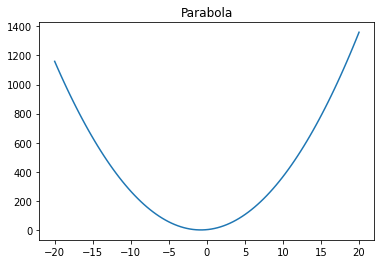

In [97]:
# we can plot the values with matplotlib

plt.plot(points, output)
plt.title('Parabola')
plt.show()